In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


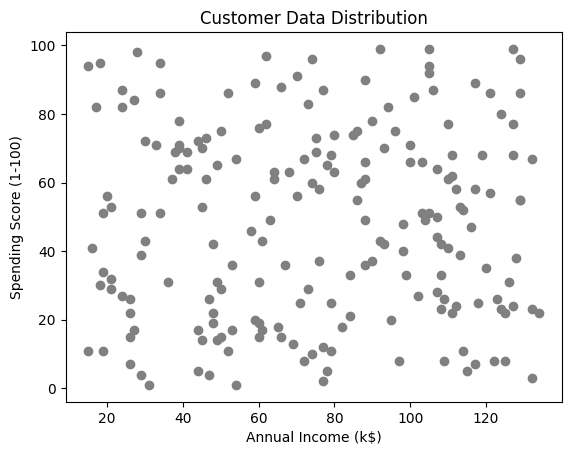

In [ ]:
# Create or load sample dataset
data = pd.DataFrame({
    'CustomerID': range(1, 201),
    'Annual Income (k$)': np.random.randint(15, 135, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
})

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], color='gray')
plt.title('Customer Data Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


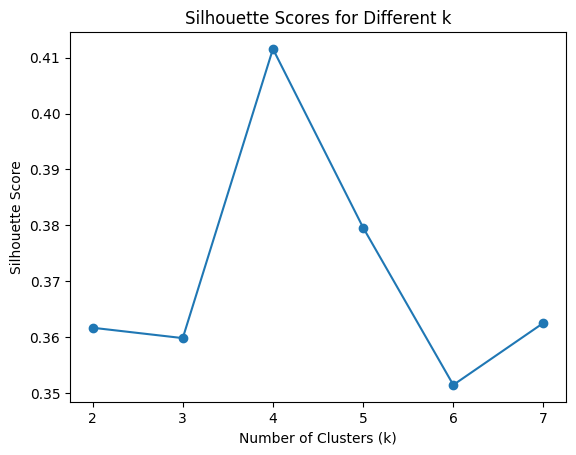

Best k: 4


In [ ]:
# Apply k means clustering
# Try different k values
sil_scores = []
K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil)

plt.plot(K, sil_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Choose optimal k (highest silhouette)
best_k = K[np.argmax(sil_scores)]
print(f"Best k: {best_k}")

# Final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


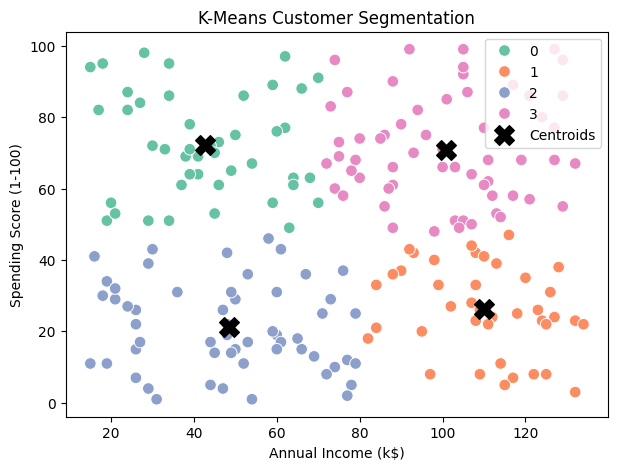

K-Means Silhouette Score: 0.412


In [ ]:
# Visualize clusters
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    data=data,
    palette='Set2',
    s=70
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.title("K-Means Customer Segmentation")
plt.legend()
plt.show()

print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_):.3f}")


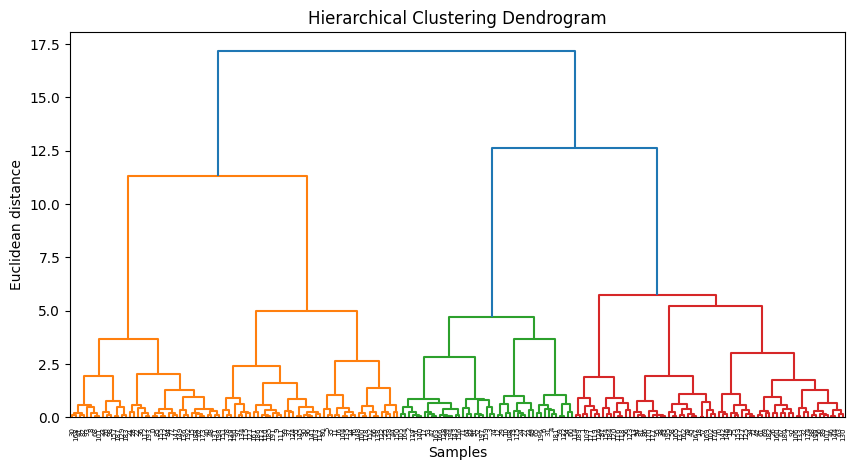

In [ ]:
# Dendogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distance")
plt.show()


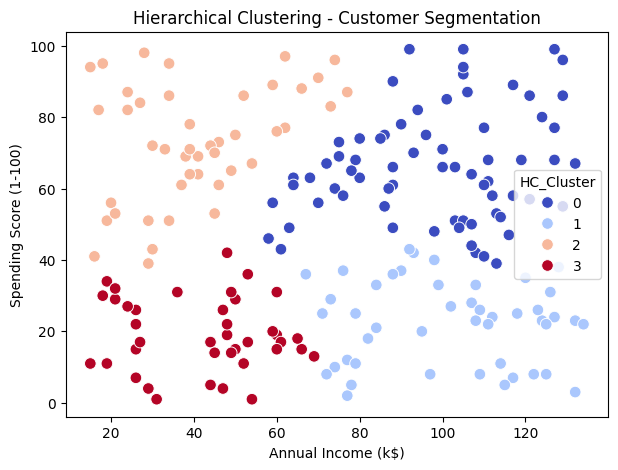

Hierarchical Clustering Silhouette Score: 0.376


In [ ]:
# Fit agglomeratice clusterin
hc = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
data['HC_Cluster'] = hc.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='HC_Cluster',
    data=data,
    palette='coolwarm',
    s=70
)
plt.title("Hierarchical Clustering - Customer Segmentation")
plt.show()

print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(X_scaled, hc.labels_):.3f}")
